#Problem 1

Dataset- Activity<br>
Dataset Description-Activity dataset shows how has global plastic waste disposal method changed over time.

TODO 1: Create an animated bar chart to illustrate how waste disposal methods have evolved over the years.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation



In [59]:
# Here we will import the data first and and then drop the null values
waste_data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/activity.xlsx')
cleaned_data = waste_data.dropna()
cleaned_data = cleaned_data[cleaned_data['Type'] != 'Generation']



In [141]:
cleaned_data

,year,Value,Type
2,1960,5.6,Recycling
3,1960,0.0,Combustion with energy recovery
4,1960,82.5,Landfilling and other disposal
7,1970,8.0,Recycling
8,1970,0.5,Combustion with energy recovery
9,1970,112.6,Landfilling and other disposal
12,1980,14.5,Recycling
13,1980,2.8,Combustion with energy recovery
14,1980,134.3,Landfilling and other disposal
18,1990,29.8,Combustion with energy recovery


<ipython-input-62-bec2a27c8b39>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-62-bec2a27c8b39>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-62-bec2a27c8b39>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-62-bec2a27c8b39>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-62-bec2a27c8b39>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

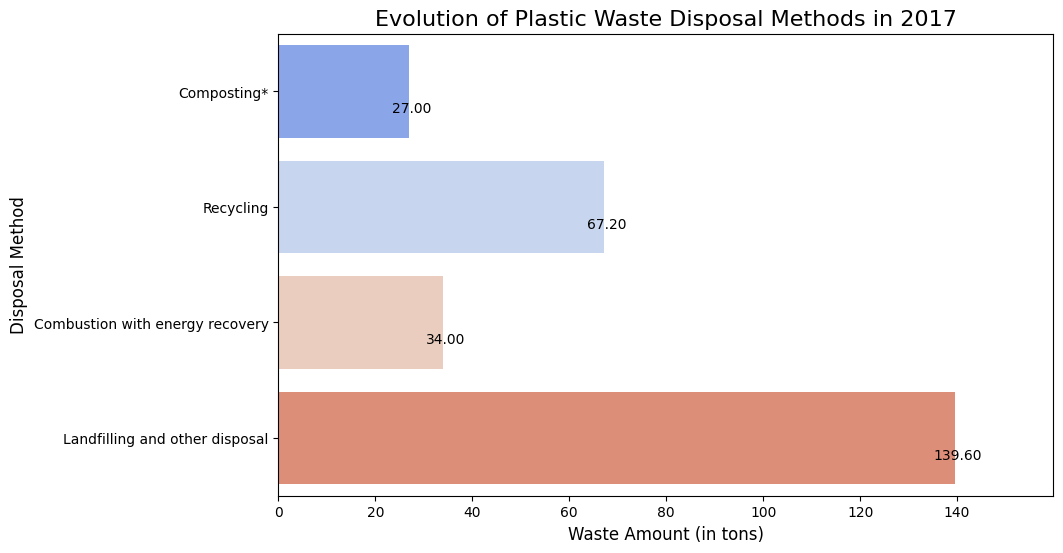

In [62]:

cleaned_data.sort_values(by='year', inplace=True)
figure, axis = plt.subplots(figsize=(10, 6))


def animate(current_year):
    axis.clear()
    data_for_current_year = cleaned_data[cleaned_data['year'] == current_year]
    sns.barplot(x='Value', y='Type', data=data_for_current_year, palette='coolwarm', ax=axis)
    axis.set_title(f'Evolution of Plastic Waste Disposal Methods in {current_year}', fontsize=16)
    axis.set_xlabel('Waste Amount (in tons)', fontsize=12)
    axis.set_ylabel('Disposal Method', fontsize=12)
    axis.set_xlim(0, cleaned_data['Value'].max() * 1.1)
    for bar in axis.patches:
        axis.text(bar.get_width() + 0.5, bar.get_y() + 0.55, f'{bar.get_width():.2f}', ha='center', va='center')


all_years = sorted(cleaned_data['year'].unique())
animation_plot = animation.FuncAnimation(figure, animate, frames=all_years, repeat=False)
animation_plot.save('plastic_waste_animation.gif', writer='pillow', fps=1)
plt.show()

TODO 2: What key insights can you draw from the visualization

1)**1960 Trends:** In 1960, landfilling was the predominant method for disposing of plastic waste, with approximately 60 tons generated, indicating that it was the most widely used disposal method at the time. Only three methods were utilized in that year: landfilling, recycling, and energy recovery.

2)**2000 Overview:** By the year 2000, the composting method was introduced as a waste disposal option. However, landfilling continued to be the most commonly used method for disposing of plastic waste.

3)**2000-2010 Developments:** Between 2000 and 2010, there was a notable increase in the use of both combustion and recycling methods for plastic waste disposal, indicating a shift in waste management practices.

4)**Long-Term Trends:** Over the years, the reliance on landfilling has declined, while the use of combustion and recycling methods has increased. This trend is a very positive development for waste management, reflecting an improvement in sustainable practices and a move towards more environmentally friendly disposal methods.


#Problem 2

Dataset - Global 500<br>
Dataset Description - Fortune Global 500 List is a list of largest corporations worldwide which are measured by their total fiscal year revenues. Companies rankings sorted by total revenues for their respective fiscal years ended on or before March 31 of the relevant year.

TODO 1: Using treemap infer which countries dominate the global revenue landscape
Interpret your key findings from the map<br>
Hint: Perform data preprocessing before plotting the map

In [104]:
import plotly.express as px
global_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/Global 500.xlsx')

# We need to remove the '$' and unneccessary commasfrom revenue column and convert it to numeric
global_data['Revenues($millions)'] = global_data['Revenues($millions)'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Aggregate total revenue by country
revenue_by_country = global_data.groupby('Country')['Revenues($millions)'].sum().reset_index()

# Sorting values
revenue_by_country = revenue_by_country.sort_values('Revenues($millions)', ascending=False)

# treemap
fig = px.treemap(revenue_by_country,
                 path=['Country'],
                 values='Revenues($millions)',
                 title='Global Revenue Distribution by Country',
                 color='Revenues($millions)',
                 color_continuous_scale='Viridis')

fig.show()

Top Countries by Revenue: The plot clearly shows that the USA and China are the largest countries in terms of revenue, with the USA generating approximately
$8.48 trillion and China about 6.04 trillion. The USA is home to major companies like Amazon and Walmart, contributing significantly to its overall revenue.

Japan and Germany's Position: Following the USA and China, Japan and Germany rank third and fourth globally in revenue. Notable companies in these countries include Toyota and Mitsubishi, which play a crucial role in their economic output.

Similar Revenue Levels: Countries such as India, Brazil, Canada, and Taiwan have revenues that are nearly equal, each hovering around $2 trillion. This indicates a competitive economic landscape among these natio

#Problem 3


Dataset - AirQualityUCI<br>
Dataset Description - The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

TODO 1: Analyze the relationships between pollutants and environmental factors (T, RH, AH) using a scatter matrix (pair plot).
Interpret your findings from the data

In [12]:
#Importing data
air_quality=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/AirQualityUCI.xlsx')

In [13]:
#Taking only environmental factors which are needed
environmental_factor=['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'NMHC(GT)', 'T', 'RH','AH']

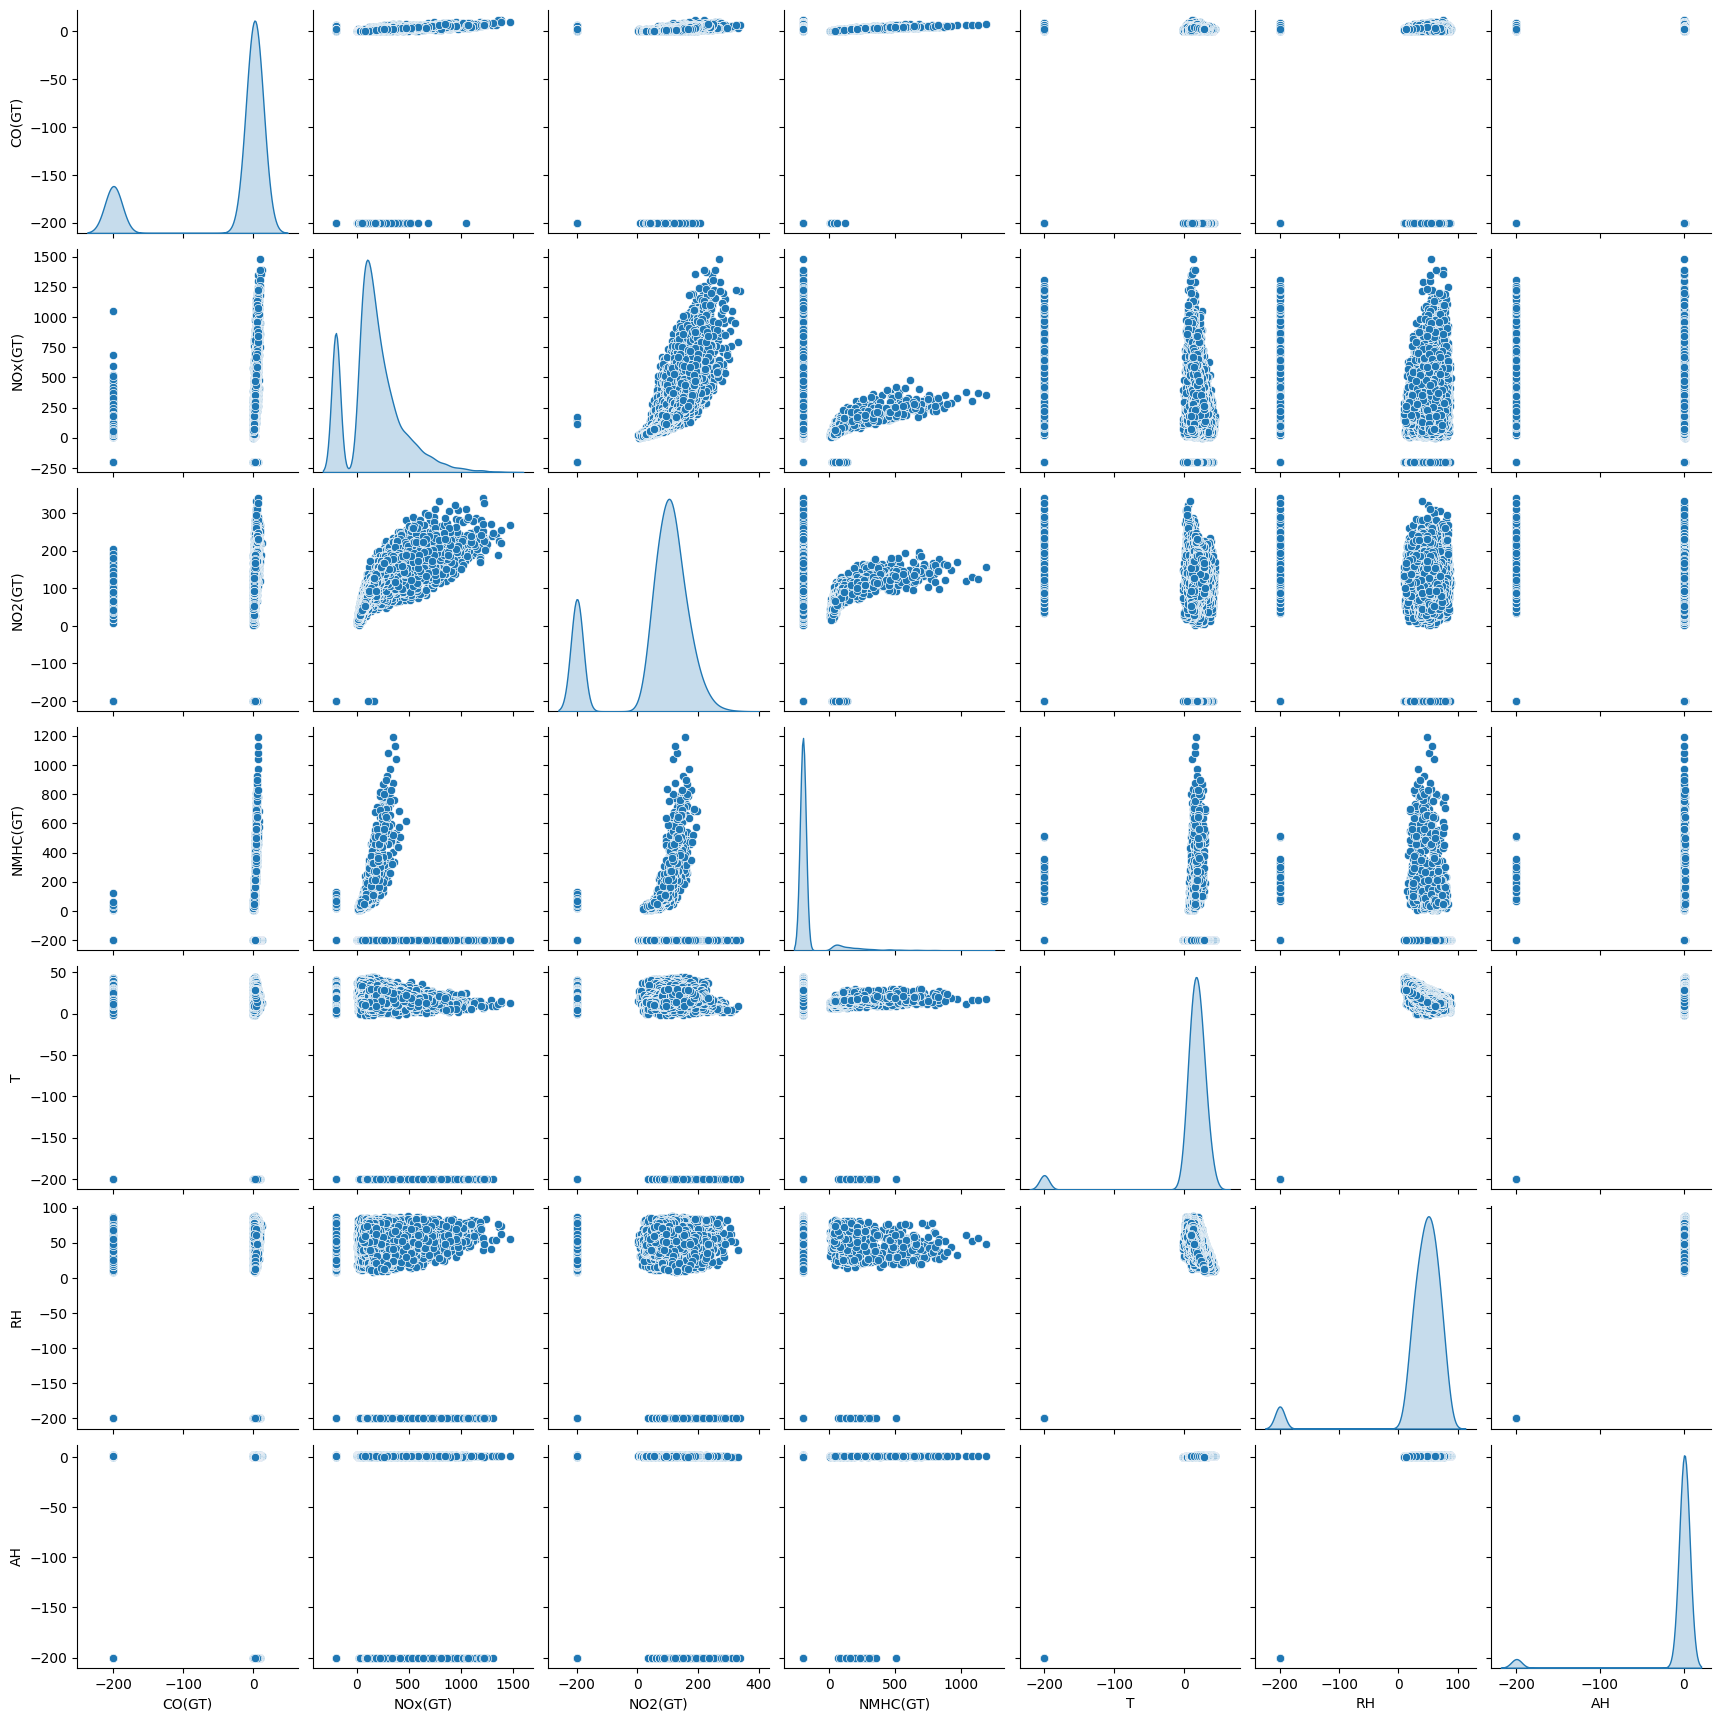

In [14]:
sns.pairplot(air_quality[environmental_factor],diag_kind='kde')
plt.show()


**Distribution of Pollutants:** Pollutants such as CO(GT), NOx(GT), and NO2(GT) display right-skewed distributions, suggesting that lower concentrations are prevalent, while there are occasional instances of significantly higher levels.

**Temperature Effects**: There is a noticeable positive correlation between temperature (T) and pollutants like CO(GT), NMHC(GT), and NOx(GT). As temperatures rise, so do the levels of these pollutants, which could be attributed to heightened emissions from various human activities during warmer weather.

**Humidity Relationships:** Relative Humidity (RH) appears to have a slight negative correlation with certain pollutants, including CO(GT) and NOx(GT). This implies that higher humidity levels may be associated with lower concentrations of these pollutants, possibly because moisture in the air helps disperse them.

**Humidity and Temperature Connection:** Absolute Humidity (AH) exhibits a strong positive correlation with Temperature (T). This relationship is intuitive, as warmer air can hold more moisture, thereby directly influencing absolute humidity levels.

#Problem 4

Dataset: [Wine Classification Dataset](https://archive.ics.uci.edu/ml/datasets/wine)<br>
Dataset Description : These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

TODO 1: Calculate the cumulative variance explained by each of the first two principal components using the raw data (without standardization). Explain how much of the total variance is captured by these two components.

In [15]:
# ucimlrepo package
!pip install ucimlrepo

In [108]:
#Import the dataset into your code
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets



In [109]:
wine.metadata

{'uci_id': 109,
 'name': 'Wine',
 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine',
 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv',
 'abstract': 'Using chemical analysis to determine the origin of wines',
 'area': 'Physics and Chemistry',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 178,
 'num_features': 13,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1992,
 'last_updated': 'Mon Aug 28 2023',
 'dataset_doi': '10.24432/C5PC7J',
 'creators': ['Stefan Aeberhard', 'M. Forina'],
 'intro_paper': {'ID': 246,
  'type': 'NATIVE',
  'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings',
  'authors': 'S. Aeberhard, D. Coomans, O. Vel',
  'venue': 'Pattern Recognition',
  'year': 1994,
  'journal': None,
  'DOI': '10.1016/003

In [111]:
wine.variables

,name,role,type,demographic,description,units,missing_values
0,class,Target,Categorical,None,None,None,no
1,Alcohol,Feature,Continuous,None,None,None,no
2,Malicacid,Feature,Continuous,None,None,None,no
3,Ash,Feature,Continuous,None,None,None,no
4,Alcalinity_of_ash,Feature,Continuous,None,None,None,no
5,Magnesium,Feature,Integer,None,None,None,no
6,Total_phenols,Feature,Continuous,None,None,None,no
7,Flavanoids,Feature,Continuous,None,None,None,no
8,Nonflavanoid_phenols,Feature,Continuous,None,None,None,no
9,Proanthocyanins,Feature,Continuous,None,None,None,no


In [110]:
#PCA without standardizing
pca_raw = PCA(n_components=2)
pca_raw.fit(X)


explained_variance_raw = pca_raw.explained_variance_ratio_
cumulative_variance_raw = np.cumsum(explained_variance_raw)

print("Explained variance (raw data):", explained_variance_raw)
print("Cumulative variance (raw data):", cumulative_variance_raw)

Explained variance (raw data): [0.99809123 0.00173592]
Cumulative variance (raw data): [0.99809123 0.99982715]


TODO 2: Use the function PCA() on the centered but not scaled data to calculate the principal components. Compare how the components differ when using centered-only data versus raw data. Discuss any shifts in the proportion of variance explained.

In [114]:
#Finding centered values
centered_data = X - np.mean(X,axis=0)

pca_centered = PCA(n_components=2)
pca_centered.fit(centered_data)

explained_variance_centered = pca_centered.explained_variance_ratio_
cumulative_variance_centered = np.cumsum(explained_variance_centered)

print("Explained variance (centered data):", explained_variance_centered)
print("Cumulative variance (centered data):", cumulative_variance_centered)

Explained variance (centered data): [0.99809123 0.00173592]
Cumulative variance (centered data): [0.99809123 0.99982715]


TODO 3: Use PCA on the standardized data but compute the top three principal components instead of the first two. Compare how much more variance is captured by including the third principal component.

In [28]:
from sklearn.preprocessing import StandardScaler

In [115]:
#Standardizing Data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)

pca_standardized = PCA(n_components=3)
pca_standardized.fit(standardized_data)


explained_variance_standardized = pca_standardized.explained_variance_ratio_
cumulative_variance_standardized = np.cumsum(explained_variance_standardized)

print("Explained variance (standardized data):", explained_variance_standardized)
print("Cumulative variance (standardized data):", cumulative_variance_standardized)

Explained variance (standardized data): [0.36198848 0.1920749  0.11123631]
Cumulative variance (standardized data): [0.36198848 0.55406338 0.66529969]


TODO 4: Compare the results of PCA on standardized vs. min-max normalized data. Discuss the impact of these two techniques on the PCA outcomes.

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [31]:

# z-score normalization
scaler_standard = StandardScaler()
standardized_data = scaler_standard.fit_transform(X)


pca_standardized = PCA(n_components=3)
pca_standardized.fit(standardized_data)

explained_variance_standardized = pca_standardized.explained_variance_ratio_
cumulative_variance_standardized = np.cumsum(explained_variance_standardized)

print("Explained variance (standardized data):", explained_variance_standardized)
print("Cumulative variance (standardized data):", cumulative_variance_standardized)

# Normalizing data
scaler_minmax = MinMaxScaler()
normalized_data = scaler_minmax.fit_transform(X)


pca_normalized = PCA(n_components=3)
pca_normalized.fit(normalized_data)

explained_variance_normalized = pca_normalized.explained_variance_ratio_
cumulative_variance_normalized = np.cumsum(explained_variance_normalized)

print("Explained variance (min-max normalized data):", explained_variance_normalized)
print("Cumulative variance (min-max normalized data):", cumulative_variance_normalized)

Explained variance (standardized data): [0.36198848 0.1920749  0.11123631]
Cumulative variance (standardized data): [0.36198848 0.55406338 0.66529969]
Explained variance (min-max normalized data): [0.40749485 0.18970352 0.08561671]
Cumulative variance (min-max normalized data): [0.40749485 0.59719836 0.68281507]


TODO 5: Instead of plotting only the first two PCs, generate a 3D plot using the first three principal components. Use color to differentiate wine classes and interpret the additional insights from the third component.
python

In [132]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [133]:
X_pca_std = pca_standardized.fit_transform(standardized_data)
pc1 = X_pca_std[:, 0]
pc2 = X_pca_std[:, 1]
pc3 = X_pca_std[:, 2]

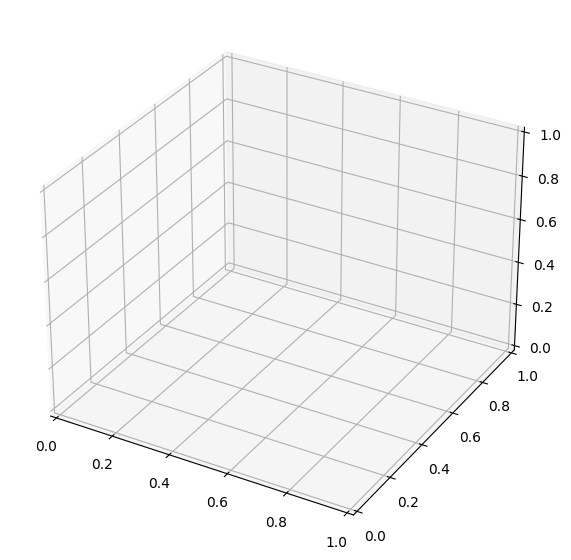

In [134]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

In [135]:
scatter = ax.scatter(pc1, pc2, pc3, c=y, cmap='viridis', edgecolor='k', s=40)

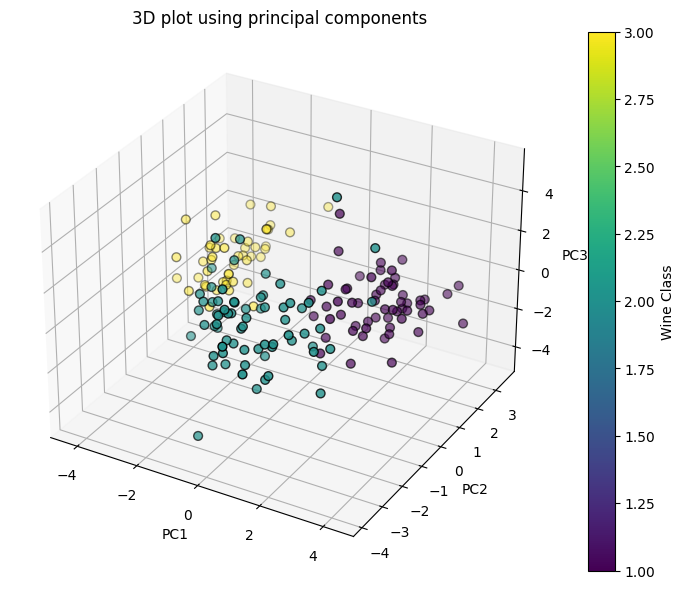

In [136]:
#plotting the data

ax.set_title("3D plot using principal components")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
color = fig.colorbar(scatter, ax=ax, label='Wine Class')
plt.show()
fig

**Principal Component 1 (PC1):** Represents the highest amount of variance in the dataset, highlighting the most pronounced differences among the wine samples.

**Principal Component 2 (PC2)**: Accounts for the second largest variance, capturing variations that are independent of those represented by PC1.

**Principal Component 3 (PC3):** Captures additional variance that may not be explained by PC1 and PC2, allowing for more detailed differentiation of the samples.

**Separation of Wine Classes:** The analysis reveals a distinct separation among the three wine categories, illustrating the effectiveness of PCA in distinguishing between them.

**Class Distinction:** PC1 is particularly effective in differentiating between the various wine classes.

**Further Differentiation:** Both PC2 and PC3 contribute to refining the separation of overlapping classes, with PC3 revealing subtle distinctions in a three-dimensional representation.

#Problem 5<br>
Dataset: Life Expectancy

**Introduction:** The above dataset gives life expectancy related data for 37 countries in 2014.

Consider only the following variables in your analysis: 'GDP', 'Income composition of resources', 'Schooling', and 'Total expenditure'.

TODO 1: Perform Z-score normalization on the numeric variables to scale the data. Compare the distribution of features before and after Z-score normalization and discuss the effect on variance.

In [137]:
#Importing Data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Life Expectancy.csv')

In [88]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,Australia,2014,Developed,82.7,6,1,9.71,10769.363050,91.0,340,...,92,9.42,92,0.1,62214.691200,2346694.0,0.6,0.6,0.936,20.4
2,Austria,2014,Developed,81.4,66,0,12.32,8350.193523,98.0,117,...,98,11.21,98,0.1,51322.639970,8541575.0,1.8,2.0,0.892,15.9
3,Bangladesh,2014,Developing,71.4,132,98,0.01,10.446403,97.0,289,...,97,2.82,97,0.1,184.565430,15945279.0,18.1,18.6,0.570,10.0
4,Belgium,2014,Developed,89.0,76,0,12.60,7163.348923,98.0,70,...,99,1.59,99,0.1,47439.396840,112957.0,1.0,1.0,0.890,16.3


In [138]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df_numeric = df[numeric_cols]
scaler = StandardScaler()
df_numeric_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_cols)
print("Z-score Normalized Data:")
print(df_numeric_normalized.head())


Z-score Normalized Data:
   Year  Life expectancy   Adult Mortality  infant deaths   Alcohol  \
0   0.0         -1.517367         1.243871      -0.046452 -1.082462   
1   0.0          0.911111        -1.242096      -0.401464  1.159808   
2   0.0          0.772645        -0.679236      -0.407099  1.763140   
3   0.0         -0.292477        -0.060089       0.145142 -1.082462   
4   0.0          1.582138        -0.585425      -0.407099  1.827866   

   percentage expenditure  Hepatitis B  Measles       BMI   \
0               -0.526543    -0.538579 -0.317693 -1.158468   
1                2.048225     0.577049 -0.326338  1.155703   
2                1.465868     0.846338 -0.339019  0.717228   
3               -0.541727     0.807868 -0.329238 -1.202315   
4                1.180163     0.846338 -0.341692  1.024160   

   under-five deaths      Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0           -0.035392 -0.970515           0.619128    -0.891875  -0.411981   
1           -0.4015

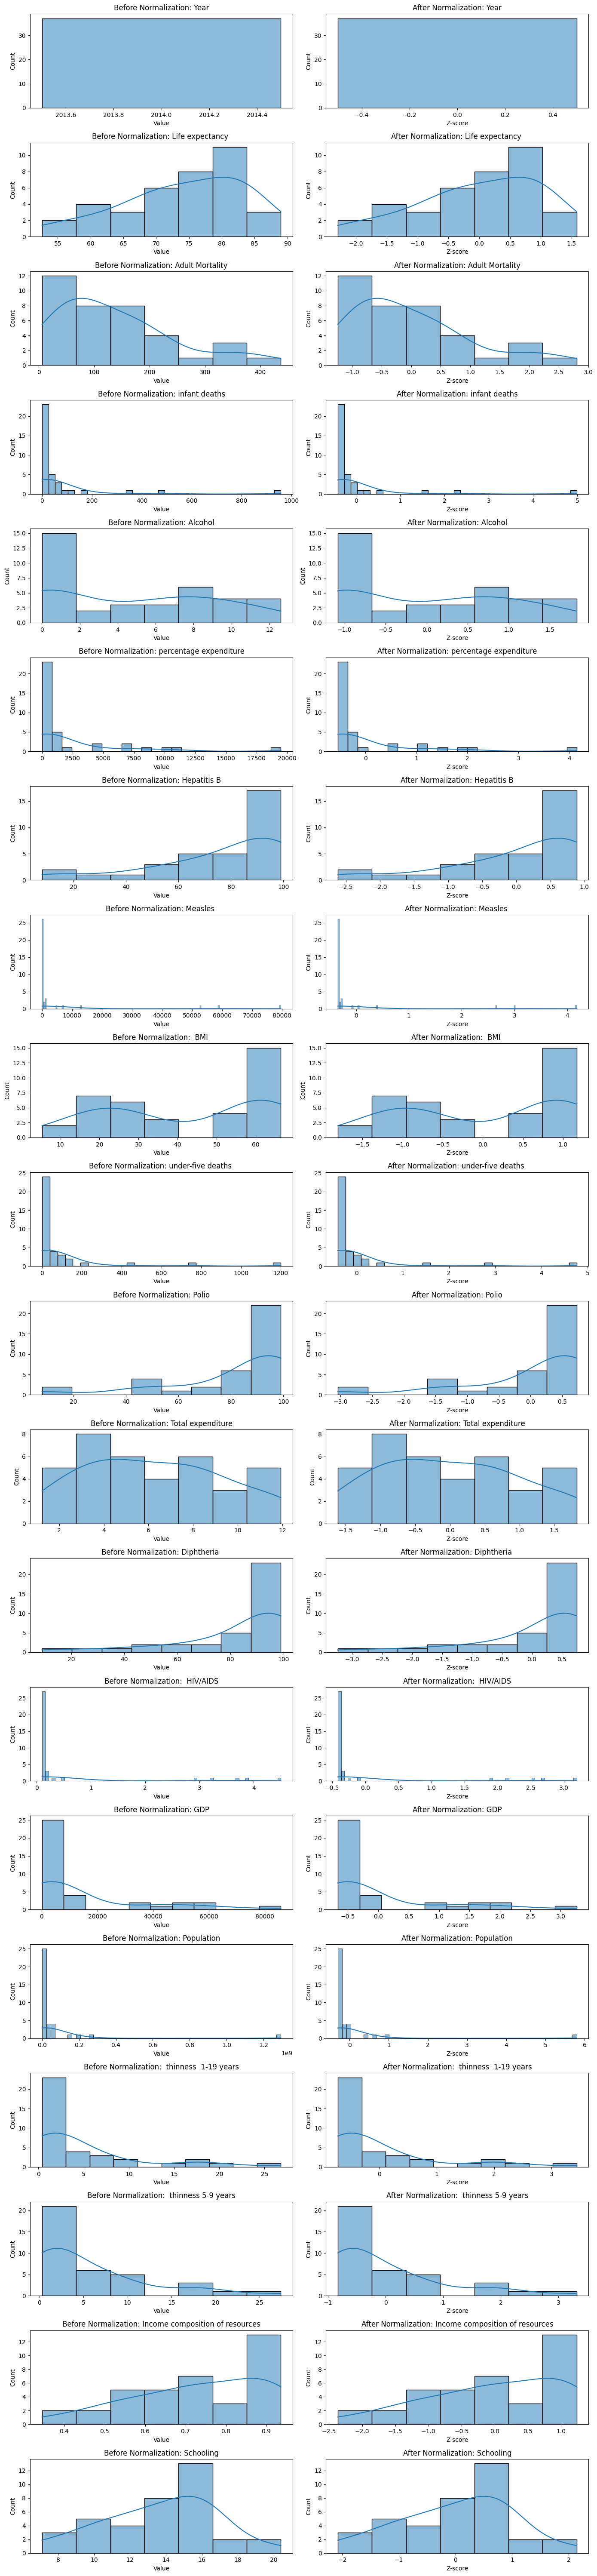

Variance before normalization:
Year                               0.000000e+00
Life expectancy                    9.059422e+01
Adult Mortality                    1.167886e+04
infant deaths                      3.236630e+04
Alcohol                            1.923388e+01
percentage expenditure             1.773588e+07
Hepatitis B                        6.961818e+02
Measles                            3.177893e+08
 BMI                               4.330079e+02
under-five deaths                  5.538873e+04
Polio                              5.991411e+02
Total expenditure                  9.970631e+00
Diphtheria                         5.238423e+02
 HIV/AIDS                          1.530270e+00
GDP                                4.890421e+08
Population                         4.627788e+16
 thinness  1-19 years              4.137632e+01
 thinness 5-9 years                4.398565e+01
Income composition of resources    2.766310e-02
Schooling                          1.021201e+01
dtype: fl

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy for comparison
df_before_norm = df_numeric.copy()
n_cols = 2
n_rows = len(numeric_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))


for i, col in enumerate(numeric_cols):
    sns.histplot(df_before_norm[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Before Normalization: {col}')
    axes[i, 0].set_xlabel('Value')


    sns.histplot(df_numeric_normalized[col], ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'After Normalization: {col}')
    axes[i, 1].set_xlabel('Z-score')


plt.tight_layout()
plt.show()


print("Variance before normalization:")
print(df_before_norm.var())

print("\nVariance after normalization (should be close to 1):")
print(df_numeric_normalized.var())


# Z-Score Normalization and Its Effects on Variance

In this analysis, we performed **Z-score normalization** on all numeric variables in the Life Expectancy dataset. The goal of Z-score normalization is to standardize the data so that each feature has a mean of 0 and a variance of 1. This process allows us to scale features that were originally on different scales and variances, ensuring that no single feature dominates the analysis due to its scale.

## Before Normalization:
The dataset showed significant variation in the scales of different features. For instance, **GDP** had a variance of **489,042,100**, while **Schooling** had a variance of only **10.21**. Such disparities suggest that the larger variance features (like **GDP** or **Population**) would heavily influence any statistical model or analysis, potentially leading to biased results.

## After Normalization:
After applying **Z-score normalization**, the variance of every feature was approximately **1**. This means that all features now contribute equally in terms of their variability. Features with larger scales, like **GDP** or **Population**, no longer overpower features with smaller scales like **Schooling** or **Alcohol**.

## Conclusion:
Z-score normalization effectively standardizes the dataset, ensuring that each feature has equal weight in the analysis. This is crucial for models that are sensitive to feature scaling, as it prevents certain features from dominating due to their original measurement units or variances.

As a result, this step ensures a **fair comparison** between features and is an important preprocessing step for improving **model accuracy** and **interpretability**.


TODO 2: Covariance Matrix and Eigen Decomposition (PCA)
This step involves performing Principal Component Analysis (PCA) for dimensionality reduction. You’ll compute the covariance matrix and use eigen decomposition to find principal components.

In [85]:
import numpy as np


df_numeric_filled = df_numeric.copy()
df_numeric_filled[numeric_cols] = df_numeric[numeric_cols].fillna(df_numeric[numeric_cols].mean())


cov_matrix = np.cov(df_numeric_filled[numeric_cols].values.T)

print("Covariance Matrix:\n", cov_matrix)



Covariance Matrix:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  9.05942192e+01 -8.54752477e+02 -6.44883709e+02
   2.74133168e+01  1.92425763e+04  1.08425000e+02 -2.75585277e+04
   1.43615743e+02 -9.08668544e+02  1.28074024e+02  8.92700676e+00
   1.20760285e+02 -8.22596096e+00  1.11874220e+05 -3.06861301e+08
  -2.95121171e+01 -3.80200826e+01  1.48216884e+00  2.67222973e+01]
 [ 0.00000000e+00 -8.54752477e+02  1.16788589e+04  5.16370420e+03
  -1.91472237e+02 -1.70454721e+05 -1.27016667e+03  2.23097131e+05
  -1.26359377e+03  7.52349324e+03 -1.29065240e+03 -9.45976201e+01
  -1.17588964e+03  9.07072072e+01 -1.02042331e+06  2.34079673e+09
   2.45058934e+02  3.37094369e+02 -1.37235233e+01 -2.4

TODO 3: Variance Explained by Each Principal Component
This step involves calculating how much variance each principal component explains.

In [81]:

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("\nSorted Eigenvalues:\n", sorted_eigenvalues)
print("\nSorted Eigenvectors:\n", sorted_eigenvectors)



Eigenvalues:
 [4.62778798e+16 4.99758458e+08 1.70458631e+08 8.82048507e+05
 2.73171128e+04 8.19465821e+03 1.02311335e+03 2.47062562e+02
 1.76137822e+02 7.02234792e+01 5.21886960e+01 1.70968123e+01
 1.17412992e+01 7.50297730e+00 3.83042948e+00 1.55815656e+00
 1.07077494e+00 2.58703158e-01 4.30015584e-04 0.00000000e+00]

Eigenvectors:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 6.63084151e-09  2.19476330e-04  7.65084609e-07 -1.73258854e-03
  -2.59637229e-02 -5.34172410e-02  2.75269265e-02  1.33024874e-01
   1.00073908e-01 -2.67664172e-02  1.04247388e-01 -7.43531048e-01
  -4.59354758e-01  4.44023236e-03 -3.69889187e-01  3.13331822e-02
   2.30017596e-01  4.22880432e-02 -7.50756586e-03  0.00000000e+00]
 

In [101]:

explained_variance_ratio = eigenvalues/np.sum(eigenvalues)

print("Explained Variance by each Principal Component:", explained_variance_ratio)



Explained Variance by each Principal Component: [9.99999985e-01 1.07990784e-08 3.68337162e-09 1.90598294e-11
 5.90284440e-13 1.77075055e-13 2.21080425e-14 5.33867498e-15
 3.80609095e-15 1.51743076e-15 1.12772442e-15 3.69438102e-16
 2.53712985e-16 1.62128802e-16 8.27702013e-17 3.36695749e-17
 2.31379426e-17 5.59021191e-18 9.29203283e-21 0.00000000e+00]


TODO 4: Reconstructing the Data Using Principal Components
This task would involve using the principal components to approximate the original data by reconstructing it from the top few principal components.

In [102]:

k = 5
top_k_components = sorted_eigenvectors[:, :k]


projected_data = np.dot(df_numeric_normalized, top_k_components)


reconstructed_data = np.dot(projected_data, top_k_components.T)

reconstructed_df = pd.DataFrame(reconstructed_data, columns=numeric_cols)


print("Reconstructed Data (using top 5 principal components):")
print(reconstructed_df.head())


Reconstructed Data (using top 5 principal components):
   Year  Life expectancy   Adult Mortality  infant deaths   Alcohol  \
0   0.0         -0.011230         0.106865       0.240210 -0.003006   
1   0.0          0.024098        -0.225267      -0.536373  0.006616   
2   0.0          0.020992        -0.197572      -0.460648  0.005702   
3   0.0         -0.004820         0.044533       0.108837 -0.001365   
4   0.0          0.021196        -0.200790      -0.458546  0.005700   

   percentage expenditure  Hepatitis B  Measles       BMI   \
0               -0.483548    -0.007132 -0.318708 -0.010868   
1                2.014013     0.009474 -0.325682  0.021145   
2                1.439908     0.010120 -0.338405  0.019218   
3               -0.548349    -0.001260 -0.328882 -0.003885   
4                1.150983     0.012050 -0.341098  0.020176   

   under-five deaths      Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0            0.356724 -0.009975          -0.001941    -0.012211   0

TODO 5: Compare Original Data with Reconstructed Data
The task here is to compare the original data with the reconstructed data to see the difference between the two.

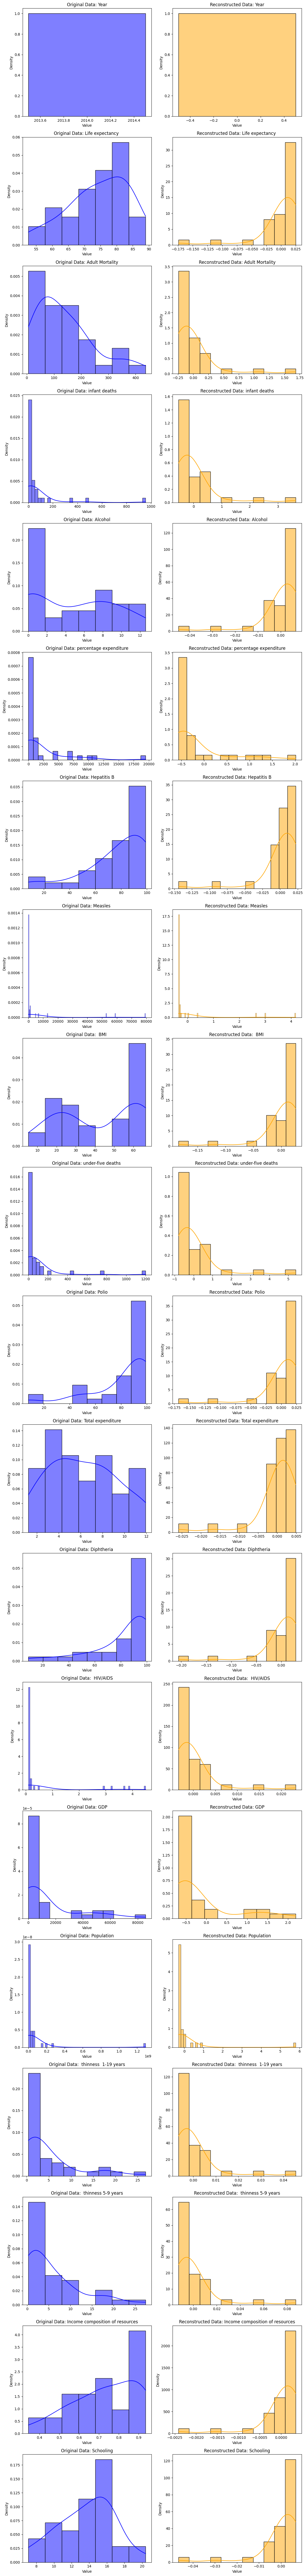


Difference between Original and Reconstructed Data (first 5 rows):
     Year  Life expectancy   Adult Mortality  infant deaths    Alcohol  \
0  2014.0         59.911230       270.893135      63.759790   0.013006   
1  2014.0         82.675902         6.225267       1.536373   9.703384   
2  2014.0         81.379008        66.197572       0.460648  12.314298   
3  2014.0         71.404820       131.955467      97.891163   0.011365   
4  2014.0         88.978804        76.200790       0.458546  12.594300   

   percentage expenditure  Hepatitis B    Measles        BMI   \
0               74.007130    62.007132  492.318708  18.610868   
1            10767.349037    90.990526  340.325682  66.078855   
2             8348.753615    97.989880  117.338405  57.080782   
3               10.994752    97.001260  289.328882  17.703885   
4             7162.197940    97.987950   70.341098  63.379824   

   under-five deaths       Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0           85.64

In [140]:

columns_to_compare = numeric_cols


n_cols = len(columns_to_compare)
fig, axes = plt.subplots(n_cols, 2, figsize=(12, 5 * n_cols))


for i, col in enumerate(columns_to_compare):
    sns.histplot(df_numeric_filled[col], ax=axes[i, 0], kde=True, color='blue', label='Original', stat='density')
    sns.histplot(reconstructed_df[col], ax=axes[i, 1], kde=True, color='orange', label='Reconstructed', stat='density')
    axes[i, 0].set_title(f'Original Data: {col}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Density')
    axes[i, 1].set_title(f'Reconstructed Data: {col}')
    axes[i, 1].set_xlabel('Value')
    axes[i, 1].set_ylabel('Density')


plt.tight_layout()
plt.show()


difference = df_numeric_filled[columns_to_compare] - reconstructed_df
print("\nDifference between Original and Reconstructed Data (first 5 rows):")
print(difference.head())
